> # Assignment 2 - Linear Regression
---

##### Importing Libraries and Dataset

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df1 = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]

In [8]:
df1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
X = df1[['area','bedrooms']]

In [10]:
X

,area,bedrooms
0,7420,4
1,8960,4
2,9960,3
3,7500,4
4,7420,4
...,...,...
540,3000,2
541,2400,3
542,3620,2
543,2910,3


In [11]:
y = df.iloc[:, [0]]

In [12]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


---
### Linear Regression Modelling
---

In [13]:
model = LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_

array([[4.23778537e+02, 7.39565941e+05]])

In [16]:
model.intercept_

array([391125.60987726])

In [17]:
model.predict([[2000,4]])

c:\Users\Prasanna Pandhare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4196946.44604557]])

In [18]:
model.score(X,y)

0.37049285246705077

---
#### Label Encoding
---

In [19]:
lEncoder = LabelEncoder()

> Converted yes/no to 1/0 

> Furnished/Semi/Non to 0/1/2

In [ ]:
df1.iloc[:,[4]] = lEncoder.fit_transform(df1.iloc[:,[4]])
df1.iloc[:,[5]] = lEncoder.fit_transform(df1.iloc[:,[5]])
df1.iloc[:,[6]] = lEncoder.fit_transform(df1.iloc[:,[6]])
df1.iloc[:,[7]] = lEncoder.fit_transform(df1.iloc[:,[7]])
df1.iloc[:,[8]] = lEncoder.fit_transform(df1.iloc[:,[8]])
df1.iloc[:,[10]] = lEncoder.fit_transform(df1.iloc[:,[10]])
df1.iloc[:,[11]] = lEncoder.fit_transform(df1.iloc[:,[11]])

In [21]:
df1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [22]:
X1 = df1[['area','bedrooms','mainroad','hotwaterheating','airconditioning','parking','furnishingstatus']]
X1

,area,bedrooms,mainroad,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,1,0,1,2,0
1,8960,4,1,0,1,3,0
2,9960,3,1,0,0,2,1
3,7500,4,1,0,1,3,0
4,7420,4,1,0,1,2,0
...,...,...,...,...,...,...,...
540,3000,2,1,0,0,2,2
541,2400,3,0,0,0,0,1
542,3620,2,1,0,0,0,2
543,2910,3,0,0,0,0,0


In [23]:
y1 = df.iloc[:, [0]]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [24]:
model1 = LinearRegression()

In [25]:
model1.fit(X1,y1)

LinearRegression()

In [26]:
model1.coef_

array([[ 2.84132583e+02,  5.82658094e+05,  6.80899048e+05,
         1.01485629e+06,  1.22252242e+06,  2.85166033e+05,
        -3.12760723e+05]])

In [27]:
model1.intercept_

array([695338.96501798])

In [28]:
model1.predict([[2000,4,1,1,1,2,1]])

c:\Users\Prasanna Pandhare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6770085.60943301]])

In [29]:
model1.score(X1,y1)

0.5362177019255414

---
#### Train-Test Split
---

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1 , random_state=10,  test_size=0.25,  shuffle=True)

In [31]:
modelFinal = LinearRegression()
modelFinal.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = modelFinal.predict(X_test)

In [33]:
r2_score = metrics.r2_score(y_pred,y_test)
mean_squared_error = metrics.mean_squared_error(y_pred,y_test)
print("R^2 Score: ", r2_score)
print("Mean Squared Error: ", mean_squared_error)

R^2 Score:  0.3451623353344614
Mean Squared Error:  1332450512127.2588


In [34]:
modelFinal.score(X_test,y_test)

0.5010183935720123

---

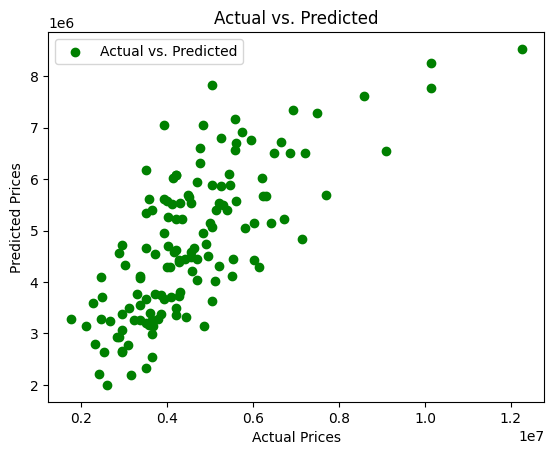

In [44]:
plt.scatter(y_test,y_pred,color='green',label='Actual vs. Predicted')
# plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='black',label='Line of Best Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

---